In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Kannada-MNIST/sample_submission.csv
/kaggle/input/Kannada-MNIST/Dig-MNIST.csv
/kaggle/input/Kannada-MNIST/train.csv
/kaggle/input/Kannada-MNIST/test.csv


# **About Kannada**

**Kannada**, historically called Canarese, **is a classical Dravidian language spoken predominantly by the people of Karnataka in the southwestern region of India**. The language is also spoken by linguistic minorities in the states of Maharashtra, Andhra Pradesh, Tamil Nadu, Telangana, Kerala and Goa; and also by Kannadigas abroad. The language had roughly 43 million native speakers by 2011. Kannada is also spoken as a second and third language by over 12.9 million non-native speakers in Karnataka, which **adds up to 56.9 million speakers**.

The Kannada language is written using the Kannada script, which evolved from the 5th-century Kadamba script.

![kannada-numbers](https://2.bp.blogspot.com/-e13ee8EcKxU/Wl7dQ32q44I/AAAAAAAAAB4/um6EcQ9gq0YL9un_WWQNpw_d_uTvrDpBgCLcBGAs/s1600/numbers-kannada1.jpg)

## **Reference**

If you wish to learn about CNNs alongwith Visualizations, you may refer:- https://www.kaggle.com/code/pythonkumar/a-z-cnn-tutorial-cats-vs-dogs

**Alongwith Visualizations you will learn about:-**

1. Colour Channels in RGB Images
2. Simple CNNs & Maxpooling
3. Dense Layers & Flattening Images
4. **Padding & Strides**
5. **Data Augmentation**
6. **Regularization**

## **ANN vs CNN**

The fundamental difference between a densely connected layer and a convolution layer is this: Dense layers learn global patterns in their input feature space (for example, for a MNIST digit, patterns involving all pixels), whereas convolution layers learn local patterns : in the case of images, patterns found in small 2D windows of the inputs.

### **IMPORTANT properties of CNNs:**

1. **The patterns they learn are translation invariant.** After learning a certain pattern in the lower-right corner of a picture, a convnet can recognize it anywhere: for example, in the upper-left corner. A densely connected network would have to learn the pattern anew if it appeared at a new location.
2. **They can learn spatial hierarchies of patterns.** A first convolution layer will learn small local patterns such as edges, a second convolution layer will learn larger patterns made of the features of the first layers, and so on. 

# **Imports**

**more to be imported as needed**

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

import tensorflow
print(tensorflow.__version__)

2.6.4


# **Data**

1. We have  28 x 28  dimension handwritten pics.
2. Dataset has been already flattened and has 784-pixel values for each pic.
3. Total we have  60000  pics in training set.

In [3]:
train_1=pd.read_csv('../input/Kannada-MNIST/train.csv')
test_1=pd.read_csv('../input/Kannada-MNIST/test.csv')
val_1=pd.read_csv('../input/Kannada-MNIST//Dig-MNIST.csv')
train_1

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
val_1

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10238,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_1

,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,4996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,4997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,4998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **Merge the Train & Val Dataframes**

**Merging the 60k Training Examples & 10k Validation Examples**

In [6]:
train=pd.concat([train_1,val_1],axis=0)
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10238,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **Explore**

* It is important to know the distribution of data according to the labels they have.
* This data set is homogeneously distributed as you see below.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='label'>

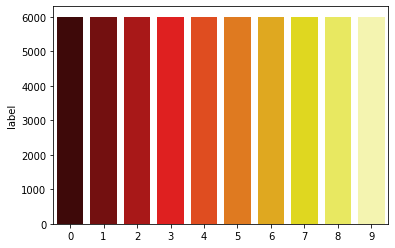

In [7]:
num = train_1.label.value_counts()
sns.barplot(num.index,num,palette='hot')

Now we can see that all of the classes has equal distribution.There are 6000 examples of each numbers in kannada in the the training dataset.Cool !

If the data **wasn't homogeneously distributed** what would we do?
1. Then we could use data augmentation techniques to generate new data for low quantity labels,
2. Or if we have enough data we can discard some high quantity labels

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='label'>

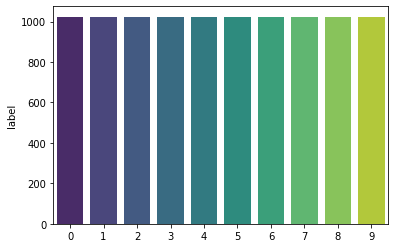

In [8]:
num = val_1.label.value_counts()
sns.barplot(num.index,num,palette='viridis')

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70240 entries, 0 to 10239
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 421.2 MB


In [10]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,70240.000000,70240.0,70240.0,70240.0,70240.000000,70240.000000,70240.000000,70240.000000,70240.000000,70240.000000,...,70240.000000,70240.000000,70240.000000,70240.000000,70240.000000,70240.000000,70240.000000,70240.000000,70240.000000,70240.0
mean,4.500000,0.0,0.0,0.0,0.002862,0.002306,0.014151,0.028531,0.039379,0.069661,...,0.017326,0.021313,0.015461,0.023405,0.025484,0.006990,0.003232,0.002904,0.002321,0.0
std,2.872302,0.0,0.0,0.0,0.758410,0.611255,1.762076,2.578725,2.851221,3.826399,...,1.581321,2.264778,1.542071,2.082495,2.412188,1.132702,0.856512,0.769729,0.615029,0.0
min,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,2.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,4.500000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,7.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,9.000000,0.0,0.0,0.0,201.000000,162.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,239.000000,255.000000,255.000000,204.000000,227.000000,204.000000,163.000000,0.0


# **See**

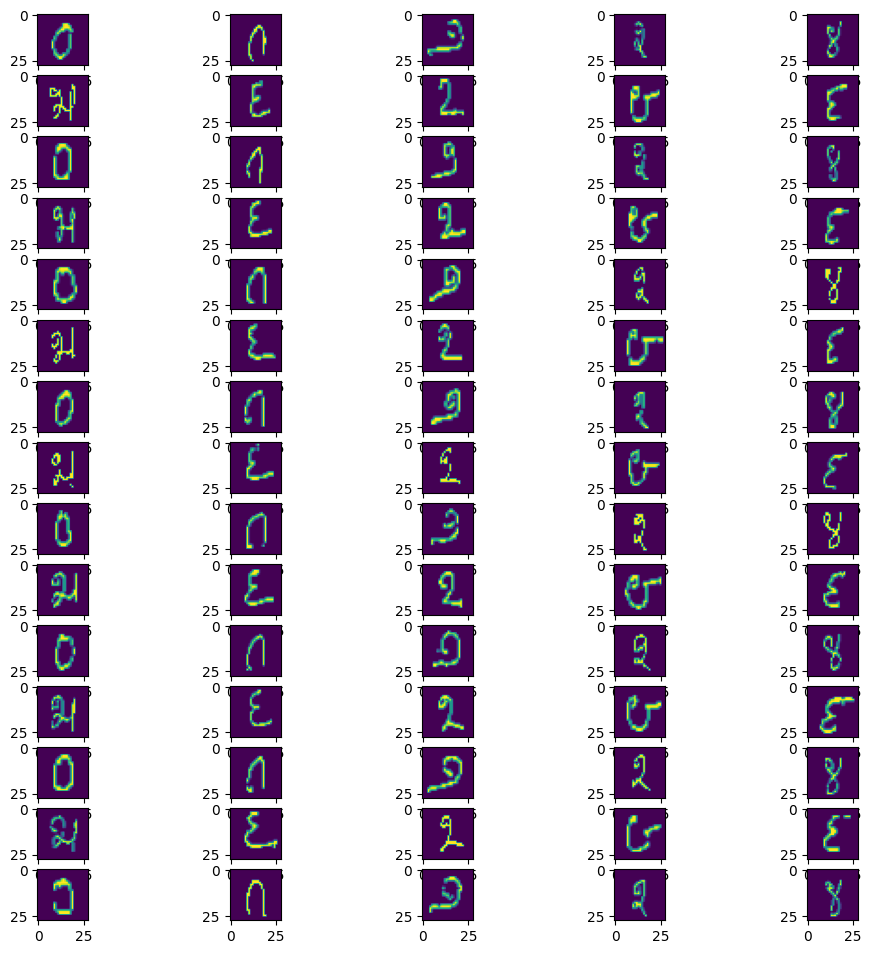

In [11]:
from keras.preprocessing.image import load_img

# Gallery using Matplotlib 
fig, ax = plt.subplots(15,5,figsize = (12,12), dpi = 100)
axes = ax.ravel()

for idx,ax  in enumerate(axes):
    path=train_1.iloc[idx,1:].values.reshape(28,28)
    ax.imshow(path)

fig.show()

# **Data Pre-processing**

### **Though the Image Data provided has already been Flattened, seems like we can Restore the Image Data using .Reshape()**

## **Train : Seggregate X & y**

In [12]:
y=train['label']
X=train.drop(['label'],axis=1)
X
# y

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## **Train-Test Split**

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
# X_train
# X_test
# y_train
y_test

42067    7
4432     2
12680    0
10851    1
10192    2
        ..
37513    3
10207    7
38240    0
19007    7
3596     6
Name: label, Length: 17560, dtype: int64

## **Train : Standardizing**

Standardization (or z-score normalization) scales the values between 0 to 1, while taking into account standard deviation. If the standard deviation of features is different, their range also would differ from each other. This reduces the effect of the outliers in the features.

In [14]:
# RobustScaler
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()

X_train= rs.fit_transform(X_train)
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## **Test : Drop ID column**

In [15]:
id=test_1.id
test=test_1.drop(['id'],axis=1)
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## **Test : Standardizing**

Standardization (or z-score normalization) scales the values between 0 to 1, while taking into account standard deviation. If the standard deviation of features is different, their range also would differ from each other. This reduces the effect of the outliers in the features.

In [16]:
test= rs.fit_transform(test)
test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# **Pure ML : Ensemble Technique**

### **Here, the Image has been Flattened already. The Image Pixel / Features are already available. A simple Logistic Regression can solve it. Any Deep Learning methods would be an OVERKILL.**

## **Voting Classifiers**

A very simple way to create an even better classifier is to aggregate the predictions of each classifier and predict the class that gets the most votes. This majority-vote classifier is called a hard voting classifier

Ensemble methods work best when the predictors are as independent from one another as possible. One way to get diverse classifiers is to train them using very different algorithms. This increases the chance that they will make very different types of errors, improving the ensemble’s accuracy.

In [17]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

vc=VotingClassifier(voting='hard',estimators=[
    ('log',LogisticRegression(penalty='elasticnet',solver='saga',l1_ratio=0.5)),
    ('knn',KNeighborsClassifier(n_neighbors=5)),
    ('nb',GaussianNB())
])

# **Train**

In [18]:
# Train the Model
vc.fit(X_train,y_train)

# Get the Model Parameters
vc.get_params(deep=True)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


{'estimators': [('log',
   LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')),
  ('knn', KNeighborsClassifier()),
  ('nb', GaussianNB())],
 'flatten_transform': True,
 'n_jobs': None,
 'verbose': False,
 'voting': 'hard',
 'weights': None,
 'log': LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga'),
 'knn': KNeighborsClassifier(),
 'nb': GaussianNB(),
 'log__C': 1.0,
 'log__class_weight': None,
 'log__dual': False,
 'log__fit_intercept': True,
 'log__intercept_scaling': 1,
 'log__l1_ratio': 0.5,
 'log__max_iter': 100,
 'log__multi_class': 'auto',
 'log__n_jobs': None,
 'log__penalty': 'elasticnet',
 'log__random_state': None,
 'log__solver': 'saga',
 'log__tol': 0.0001,
 'log__verbose': 0,
 'log__warm_start': False,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform',
 'nb__priors': None,
 'nb__var_smoothing

## **Plot Decision Boundary**

**We cannot plot the Decision Boundary of this problem as it has 284 features. It will be a hyperplane in 284D space.**

So we will plot another problem in 2D Spacw with 2 Features.

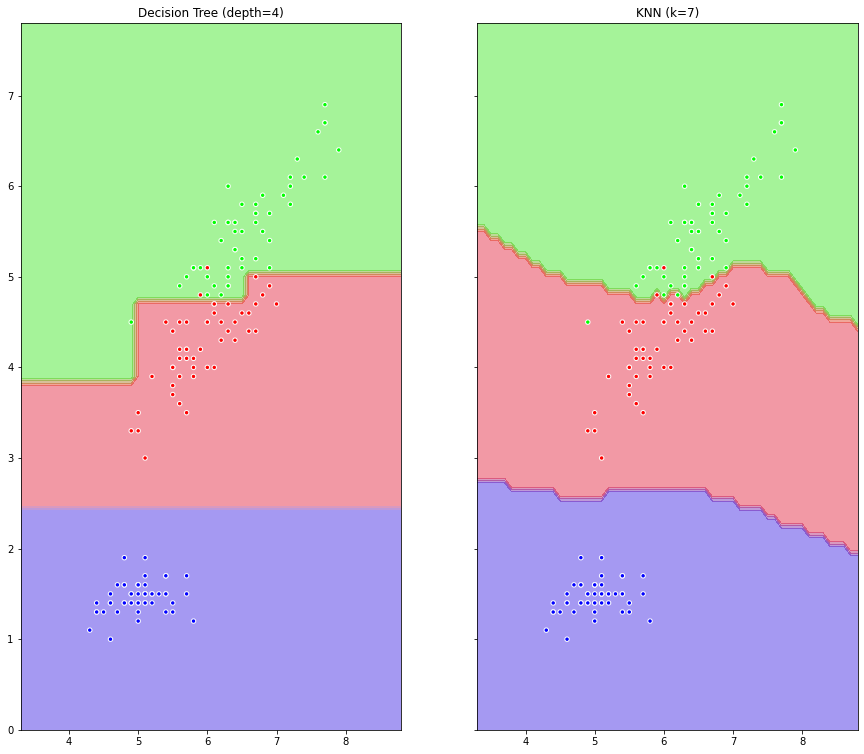

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)

clf1.fit(X, y)
clf2.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                 np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(1,2, sharex='col', sharey='row', figsize=(15,13))

for idx, clf, tt in zip([0, 1],[clf1, clf2],
                    ['Decision Tree (depth=4)', 'KNN (k=7)']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx].contourf(xx, yy, Z, alpha=0.4, cmap="brg")
    axarr[idx].scatter(X[:, 0], X[:, 1], c=y, cmap="brg",
                                  s=20, edgecolor='w')
    axarr[idx].set_title(tt)

plt.show()

# **Predict**

In [20]:
pred=vc.predict(X_test)
pred

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([7, 2, 3, ..., 0, 0, 4])

# **F1-Score**

In [21]:
from sklearn.metrics import f1_score
f1_score(y_test, pred,average=None)

array([0.70002138, 0.77427822, 0.87707437, 0.66303893, 0.8097561 ,
       0.75691134, 0.79987068, 0.58275058, 0.62688942, 0.83791653])

# **Confusion Matrix**

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred)

import plotly.express as px
fig = px.imshow(cm,text_auto=True,color_continuous_scale='RdBu_r')
fig.show()                

## Suggestions:-
* Kaggle - https://www.kaggle.com/pythonkumar
* GitHub - https://github.com/KumarPython​
* Twitter - https://twitter.com/KumarPython
* LinkedIn - https://www.linkedin.com/in/kumarpython/

# **Submission**

In [23]:
sub=vc.predict(test)

In [24]:
 submission=pd.DataFrame({'id': id,
                         'label' : sub
                        })
submission
submission.to_csv('submission.csv', index=False)